In [1]:

import logging
import seaborn as sns
from platform import python_version
import main.hist.gshm as gshm
import main.hist.cgshm as cgshm

sns.set_theme(font_scale=1.5, rc={'text.usetex' : True})
from src.main.util.logging_utils import init_logger

logger = init_logger(logging.INFO)
if python_version() <= "3.10":
    logger.warning("This script has only been tested on python 3.9. Detected: {}".format(python_version()))

import numpy as np
import matplotlib.pyplot as plt

## Plot 1: Privacy Curves as in the paper.

We use the exact parameters they have and investigate the influence of the different parts of the deta

$\begin{align*}
    \max \bigg[ &1 - \Phi \left( \frac{\tau}{\sigma} \right)^k, \\
    &\max_{j \in [k]} 1 - \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} + \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} \left[ \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon - \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) \right], \\
    &\max_{j \in [k]} \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon + \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right)
    \bigg]
    \leq \delta ,
\end{align*}$

In [3]:
# This is probabily deprecated.

#  c_u 51914, sigma 2228, tau_diff = 16176, epsilon = 0.4
c_u = 51914 # numURLs Contributed
sigma = 2228
tau_diff = 13948
epsilon = 0.349
# I guess its not.
all_deltas = gshm.threshold_add_the_delta(c_u, sigma, tau_diff, epsilon)

plt.figure(figsize=(10, 6))
x_values = range(1, c_u + 1)

plt.plot(x_values, all_deltas[0], label=f'Delta Part I')
plt.plot(x_values, all_deltas[1], label=f'Delta Part II')
plt.plot(x_values, all_deltas[2], label=f'Delta Part III')

plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15) 
plt.xscale("linear")
plt.ylabel('Upper Bound Deltas')
plt.title('Deep Dive Th 5.4')
plt.legend()
plt.grid(True)
plt.show()

/Users/jpt915/Documents/git/sparse-gaussian-histograms/src/main/util/funs.py:5: RuntimeWarning: overflow encountered in exp
  def delta_bw(epsilon, mu): return  norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
/Users/jpt915/Documents/git/sparse-gaussian-histograms/src/main/util/funs.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  def delta_bw(epsilon, mu): return  norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)


IndexError: invalid index to scalar variable.

<Figure size 1000x600 with 0 Axes>

In [6]:
# Computing the results as in the paper.
filename = "save/results.npy"
load = True
save = False

c_u = 51914 # numURLs Contributed
sigma = 2228
tau_diff = 13948
epsilon_range = np.arange(0.3,0.4,0.01) # Z values

Y = []
part1, part2, part3, maximum = [], [], [], []

for i in epsilon_range:
    d = gshm.gshm_exact(c_u, sigma, tau_diff, i)
    part1 += [d[0]]
    part2 += [d[1]]
    part3 +=  [d[2]]
    maximum += [d[3]]
    
#x_values = range(1, c_u + 1)
#X, Y = np.meshgrid(x_values, epsilon_range)
#fig = plt.figure(figsize=(20, 20))
#ax = fig.add_subplot(111, projection='3d')

#for part in all_results:
#    ax.plot_surface(X, Y, part, cmap="viridis", alpha=0.7)

#ax2 = fig.add_subplot()
#CS = ax2.contour(X,Y,part1, cmap="Greens", alpha=0.7)
#CS = ax2.contour(X,Y,part2, cmap="Oranges", alpha=0.7)
#CS = ax2.contour(X,Y,part3, cmap="Blues", alpha=0.7)

#plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
#plt.ylabel('epsilon range')
#plt.title('Deep Dive Th 5.4')
#plt.legend()
#plt.grid(True)
# plt.ion()

#plt.show()

KeyboardInterrupt: 

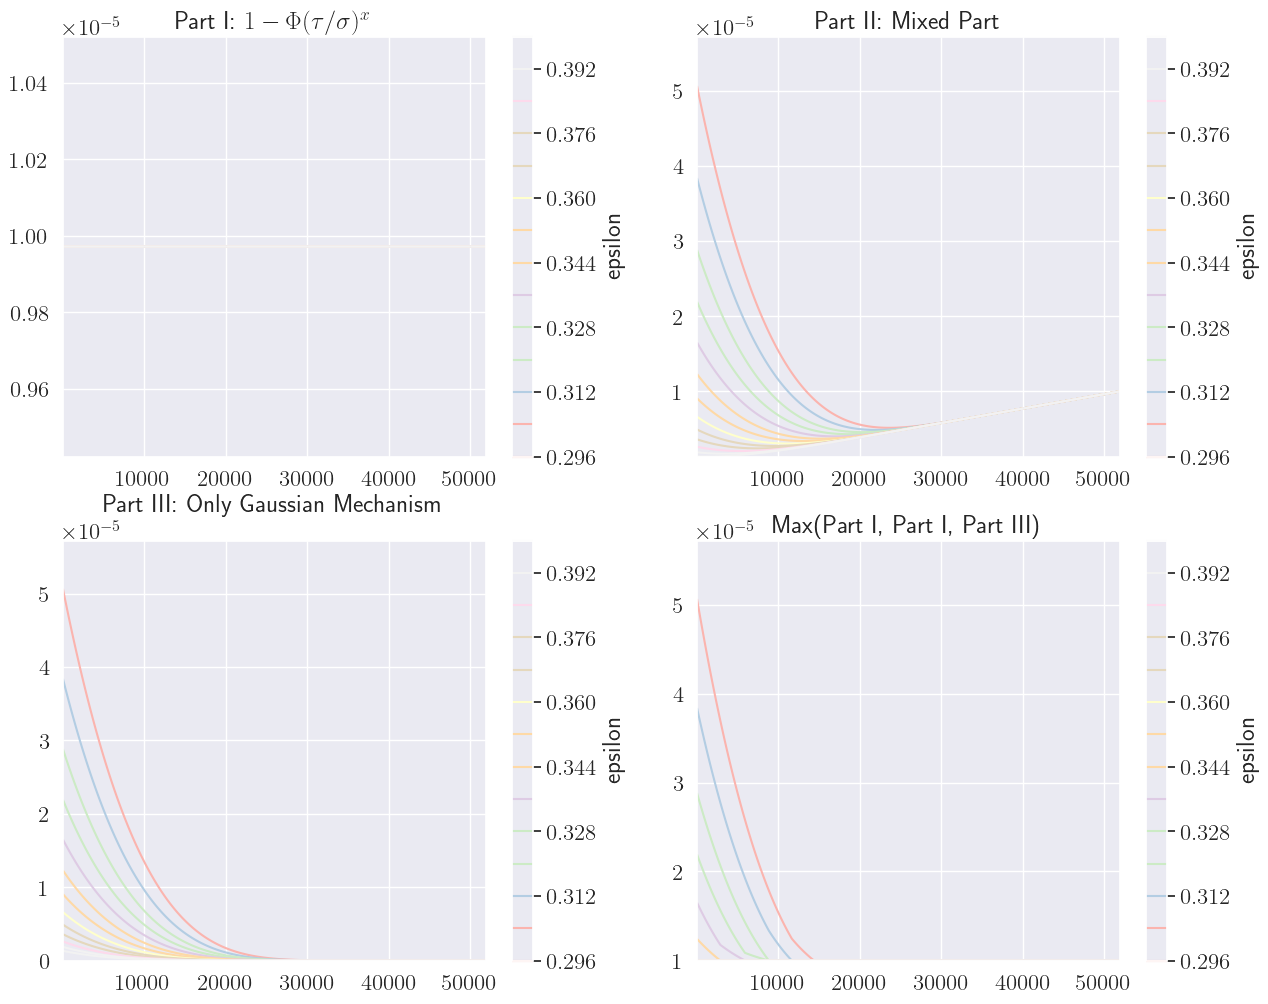

In [28]:
X, Y = np.meshgrid(range(1, c_u + 1), epsilon_range)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))

#ax2 = fig.add_subplot()
#CS = ax2.contour(X,all_results_part1,Y, levels=15, cmap="Pastel1")

#ax2 = fig.add_subplot()
CS1 = ax1.contour(X,part1,Y, levels=15, cmap="Pastel1")
ax1.set_title('Part I: $1-\\Phi(\\tau/\\sigma)^x$')
#ax1.set(ylim=(0,3))
plt.colorbar(CS1, label="epsilon")

CS2 = ax2.contour(X,part2,Y, levels=15, cmap="Pastel1")
ax2.set_title('Part II: Mixed Part')
#ax2.set(ylim=(0,3))
plt.colorbar(CS2, label="epsilon")

CS3 = ax3.contour(X,part3,Y, levels=15, cmap="Pastel1")
ax3.set_title('Part III: Only Gaussian Mechanism')
#ax3.set(ylim=(0,3))
plt.colorbar(CS3, label="epsilon")


#ax4.set_ylim(0,3)
CS4 = ax4.contour(X,maximum,Y, levels=15, cmap="Pastel1")
plt.colorbar(CS4, label="epsilon")
ax4.set_title('Max(Part I, Part I, Part III)')
ax4.set_visible(True)

#plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
#plt.title('Deep Dive Th 5.4')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.show()



[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(na

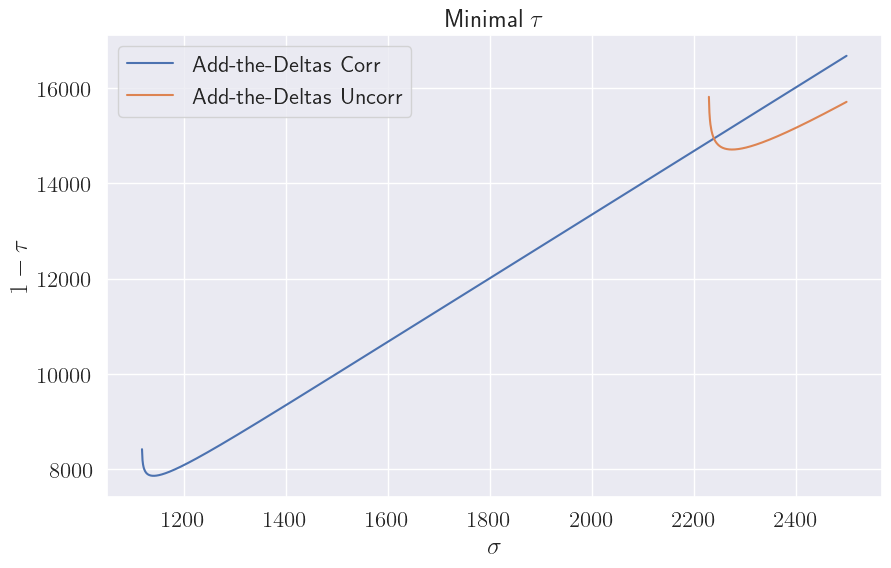

In [7]:
epsilon = 0.349
delta = 10**-5
sigmas = range(100, 2500)
k = 51914 # C_u in the paper

tau_add_deltas_correlated = [cgshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas]
tau_add_deltas_standard =   [gshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas]

# tau_exact_standard = [gsm.gshm_exact() for sigma in sigmas]
# tau_exact_standard = [gshm.gshm_exact() for sigma in sigmas]

plt.figure(figsize=(10, 6))
plt.plot(sigmas, tau_add_deltas_correlated, label='Add-the-Deltas Corr')
plt.plot(sigmas, tau_add_deltas_standard, label='Add-the-Deltas Uncorr')

print(tau_add_deltas_correlated)
print(tau_add_deltas_standard)

plt.xlabel('$\\sigma$')
# plt.yscale("symlog", linthresh=1e-15) 
plt.xscale("linear")

plt.ylabel('$1-\\tau$')
plt.title('Minimal $\\tau$')
plt.legend()
plt.grid(True)

In [22]:
## 



# Initial Convert due to ChatGPT o4
import numpy as np
import matplotlib.pyplot as plt


def delta_bw(epsilon, mu):
    return norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)

def tau_diff_func(delta, c_u, sigma):
    return norm.ppf((1 - delta) ** (1 / c_u)) * sigma

# Root Finder for mu
def findrootmu(candidate_mu, epsilon, delta):
    mu = candidate_mu
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (1 / 2 + epsilon / mu**2) - delta
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / 2 + epsilon / mu**2))
        mu = mu - f / fp
    return mu

# Root Finder for epsilon
def findroot(candidate_epsilon, mu, delta):
    epsilon = candidate_epsilon
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (-1 / mu)
              - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / mu))
        epsilon = epsilon - f / fp
    return epsilon

# General Result
def gshm_delta(c_u, sigma, tau_diff, epsilon):
    delta_arr = np.zeros(c_u)
    delta_arr2 = np.zeros(c_u)

    for i in range(1, c_u + 1):
        a_eq = i - 1
        mu = np.sqrt(c_u - a_eq) / sigma
        epsilon2 = epsilon - a_eq * np.log(norm.cdf(tau_diff / sigma))
        f = delta_bw(epsilon2, mu)

        delta_arr[i - 1] = 1 - norm.cdf(tau_diff / sigma)**a_eq + norm.cdf(tau_diff / sigma)**a_eq * f
        epsilon3 = epsilon + a_eq * np.log(norm.cdf(tau_diff / sigma))
        delta_arr2[i - 1] = delta_bw(epsilon3, mu)

    final_delta = max(1 - norm.cdf(tau_diff / sigma)**c_u, max(delta_arr), max(delta_arr2))
    return final_delta

# Parameters
c_u = 51914
eps_views = 0.349
delta = 10**(-5)
k = np.sqrt(c_u)
mu_arr = 0
extra_y = 0

# Create sigma, tau curve
mu = findrootmu(np.sqrt(eps_views), eps_views, delta)
min_sigma = k / mu
print(mu)

mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
epsilon = findroot(0.01, mu, delta)

0.10224286076858807


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def analytical_gaussian_delta(epsilon, sigma, sensitivity=1.0):
    """
    Computes delta for a given epsilon using the Analytical Gaussian Mechanism.

    Parameters:
    - epsilon: Privacy budget.
    - sigma: Noise scale (standard deviation of the Gaussian).
    - sensitivity: L2 sensitivity of the query (default is 1.0).

    Returns:
    - delta: The value of delta for the given epsilon.
    """
    term1 = norm.cdf(-sensitivity / (2 * sigma) + sigma * epsilon / sensitivity)
    term2 = np.exp(epsilon) * norm.cdf(-sensitivity / (2 * sigma) - sigma * epsilon / sensitivity)
    return term1 - term2

# Parameters
sigma = 1.0  # Noise scale
sensitivity = 1.0  # Sensitivity of the query
epsilons = np.linspace(0.01, 2, 500)  # Range of epsilon values

# Compute delta for each epsilon
deltas = [analytical_gaussian_delta(eps, sigma, sensitivity) for eps in epsilons]

# Plot the delta curve
plt.figure(figsize=(8, 5))
plt.plot(epsilons, deltas, label=f'σ = {sigma}, sensitivity = {sensitivity}')
plt.xlabel('Privacy Budget (ε)')
plt.ylabel('Privacy Loss (δ)')
plt.title('Delta Curve of the Analytical Gaussian Mechanism')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

In [3]:
n=10
epsilon = 0.349
delta = 10**-5
#sigmas = range(100, 2500)
k = 51914 # C_u in the paper
tau_exact_uncorrelated = gshm.compute_threshold_curve_tighter(delta, epsilon, k, datapoints=n, max_sigma=2600)
sigmas_uncorrelated = tau_exact_uncorrelated[0]

tau_tighter_correlated = cgshm.compute_threshold_curve_tighter(delta, epsilon, k,max_sigma=2600, datapoints=n) # TODO: not implemeted yet.

sigmas = np.linspace(2250, 2600, 500)
tau_add_deltas_correlated = [cgshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas]
tau_add_deltas_uncorrelated = [gshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas]



ValueError: math domain error

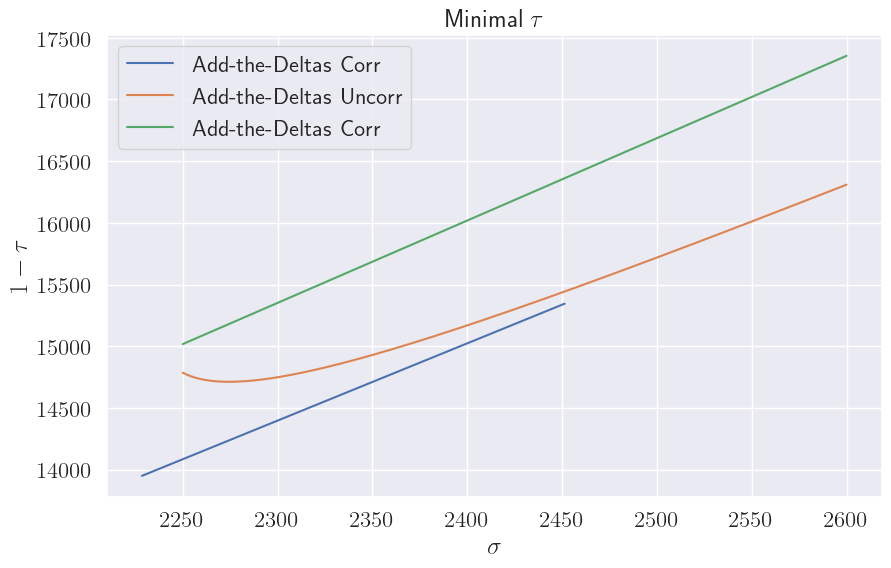

In [14]:
plt.figure(figsize=(10, 6))

plt.plot(tau_exact_uncorrelated[0], tau_exact_uncorrelated[1], label='Tau Exact Uncorrelated')
plt.plot(tau_tighter_correlated[0], tau_tighter_correlated[1], label='Tighter Correlated')
plt.plot(sigmas, tau_add_deltas_uncorrelated, label='Add-the-Deltas Uncorrelated')
plt.plot(sigmas, tau_add_deltas_correlated, label='Add-the-Deltas Correlated')

plt.xlabel('$\\sigma$')
# plt.yscale("symlog", linthresh=1e-15)
plt.xscale("linear")

plt.ylabel('$1-\\tau$'
           )
plt.title('Minimal $\\tau$')
plt.legend()